Comparing band gaps of metal oxides vs. metal nitrides...



Retrieving SummaryDoc documents:   0%|          | 0/124 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/16 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/31 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/19 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/15 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/16 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/209 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/14 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/33 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/43 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/90 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/103 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/71 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/96 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/29 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/140 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/20 [00:00<?, ?it/s]

  Metal  Oxide Band Gap  Nitride Band Gap
0    Ti        0.000000            0.0000
1    Zr        1.177400            0.3235
2    Hf        4.117333            0.4216
3     V        0.973133            0.0000
4    Nb        0.591033            0.0000
5    Ta        1.962433            0.4047
6    Cr        0.612233            0.0000
7    Mo        0.469733            0.0000
8     W        0.452833            0.4926
9    Fe        0.605233            0.0000


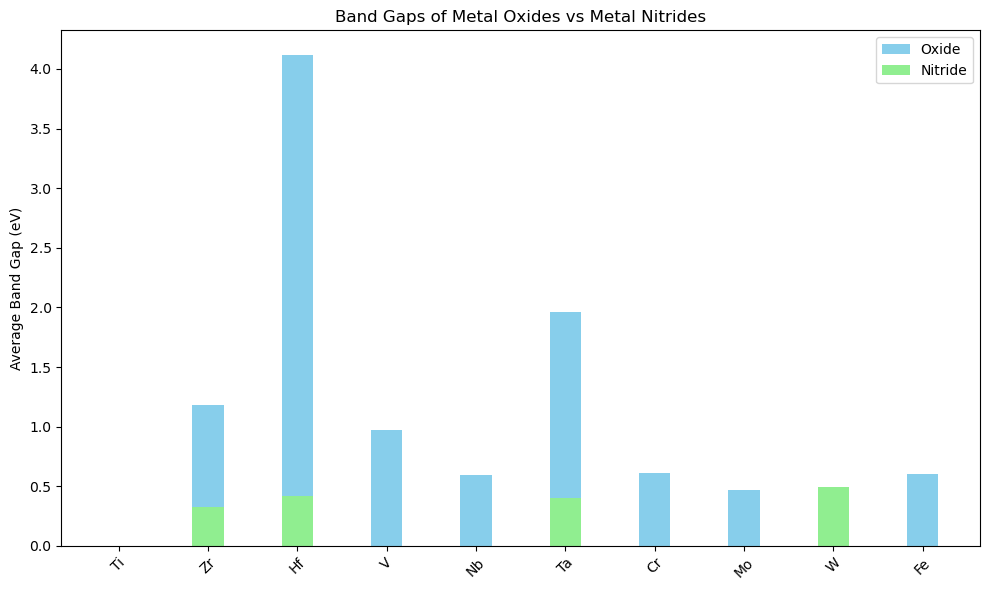

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from mp_api.client import MPRester

#Materials Project API Key must be inputted here
API_KEY = "vY4eQRy8RVhz0KWArWojEAkcMRoc8pfU"  #replace with your personal API key

#list of metals to analyze, can be changed, added to, subtracted from
metals = ["Ti", "Zr", "Hf", "V", "Nb", "Ta", "Cr", "Mo", "W", "Fe"]

def get_average_band_gap(metal, anion, mpr): #calculate average band gap
    chemsys = f"{metal}-{anion}"
    docs = mpr.materials.summary.search( #query listed materials for the following properties:
        chemsys=chemsys,
        fields=["material_id", "formula_pretty", "band_gap", "energy_above_hull"]
    )
    #filter stable materials, energy less than 0.1 eV
    stable = [ 
        doc for doc in docs
        if doc.energy_above_hull is not None and doc.energy_above_hull < 0.1 and doc.band_gap is not None
    ]
    if not stable: #if stable materials NA, return None
        return None

    top = sorted(stable, key=lambda d: d.energy_above_hull)[:3] #sort by stability
    return sum(d.band_gap for d in top) / len(top)

def compare_band_gaps():
    print("Comparing band gaps of metal oxides vs. metal nitrides...\n")
    data = [] #initialize matrix to store band gap values for each metal

    with MPRester(API_KEY) as mpr:
        for metal in metals: #loop through each metal in list
            oxide_gap = get_average_band_gap(metal, "O", mpr) #avg band gap for oxide
            nitride_gap = get_average_band_gap(metal, "N", mpr) #avg band gap for nitride
            data.append({ #append results to data list
                "Metal": metal,
                "Oxide Band Gap": oxide_gap,
                "Nitride Band Gap": nitride_gap
            })

    df = pd.DataFrame(data) #convert data list to a DataFrame
    print(df)

    #Plot bar chart
    x = df["Metal"]
    width = 0.35
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, df["Oxide Band Gap"], width, label="Oxide", color="skyblue")
    ax.bar(x, df["Nitride Band Gap"], width, label="Nitride", color="lightgreen", bottom=df["Oxide Band Gap"].where(df["Nitride Band Gap"].isnull(), 0))

    ax.set_ylabel("Average Band Gap (eV)")
    ax.set_title("Band Gaps of Metal Oxides vs Metal Nitrides")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    compare_band_gaps()

